In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [6]:
import os

In [7]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [8]:
import pandas as pd

In [10]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [11]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [12]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [13]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [15]:
pd.read_csv(schema_fname, index_col='Column')

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [16]:
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [17]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [18]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [19]:
len(selected_columns)

20

In [20]:
survey_df = survey_raw_df[selected_columns].copy()

In [21]:
schema = schema_raw[selected_columns]

In [22]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
survey_df.shape

(64461, 20)

In [25]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [27]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [26]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [28]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [29]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [30]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [32]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [33]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [35]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [36]:
import numpy as np

In [37]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [38]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [39]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
61684,Belgium,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,12.0,12.0,7.0,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...,NaN,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Designer;Developer, ful...",24.0,Slightly dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
38001,Latvia,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
23506,India,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,17.0,8.0,5.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Bash/Shell/PowerShell;Python;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,DevOps specialist,NaN,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Somewhat important
34846,Lithuania,NaN,Man,"Professional degree (JD, MD, etc.)",Web development or web design,Yes,15.0,5.0,3.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Data or business analyst;Database administrato...,40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
51541,Switzerland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Every few months,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
31434,Russian Federation,31.0,Man,Some college/university study without earning ...,"A social science (such as anthropology, psycho...",Yes,6.0,15.0,10.0,Bash/Shell/PowerShell;C#;Java;Kotlin;Rust,C#;C++;Java;Kotlin;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Data or business analyst;Developer, back-end;E...",48.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
35592,Chile,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,8.0,5.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end",NaN,Very satisfied,NaN,NaN,Very important
42817,Iraq,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C#;Java,C#;HTML/CSS;Java;JavaScript;Python,Once a decade,Visit Stack Overflow,Employed part-time,NaN,NaN,NaN,NaN,NaN,NaN
56811,United States,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,8.0,2.0,NaN,Java,C#;C++;Java;Python,Every few months,NaN,Student,NaN,NaN,NaN,Diversity of the company or organization;Flex ...,NaN,NaN
60393,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis and Visualization

In [43]:
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [44]:
schema.Country

'Where do you live?'

In [45]:
survey_df.Country.nunique()

183

In [47]:
survey_df.Country.value_counts()

Country
United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: count, Length: 183, dtype: int64

In [48]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

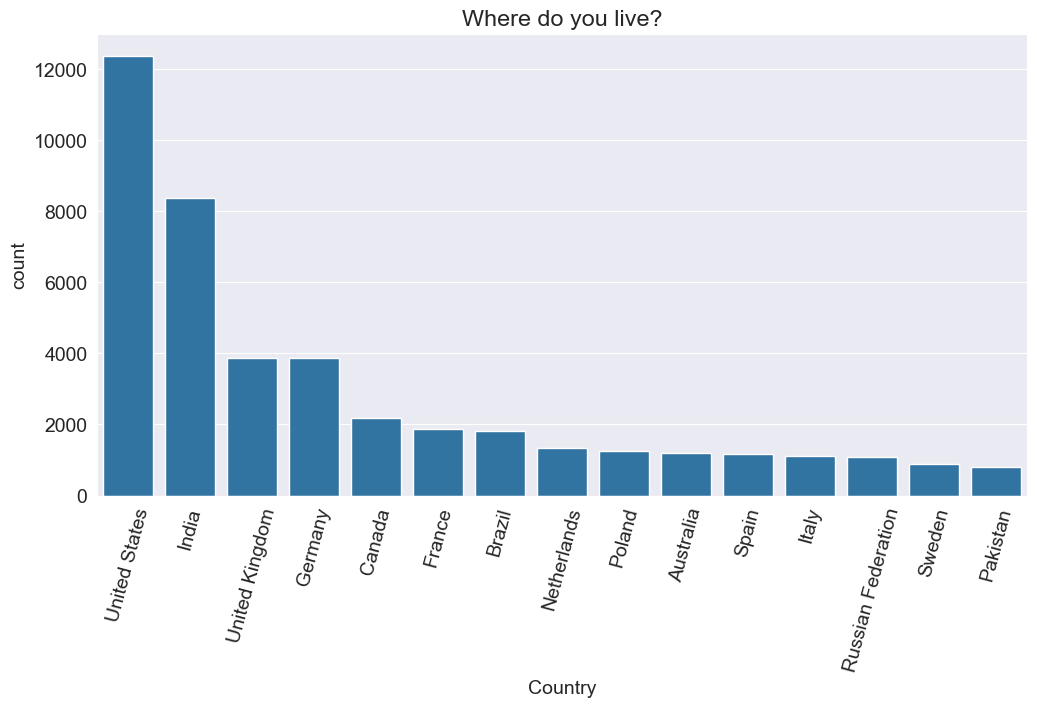

In [50]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

## Age

In [51]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

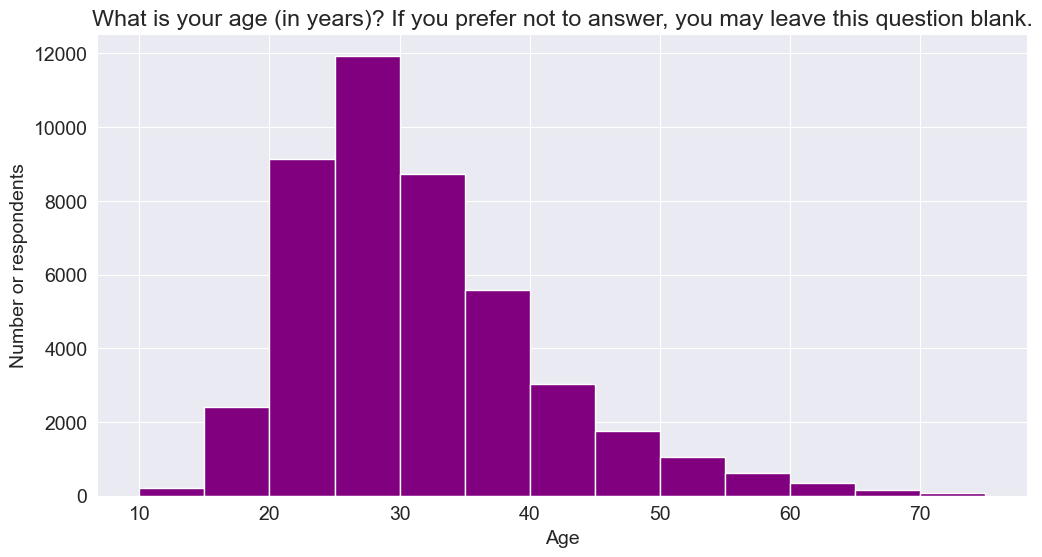

In [53]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number or respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

## Gender

In [54]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [57]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

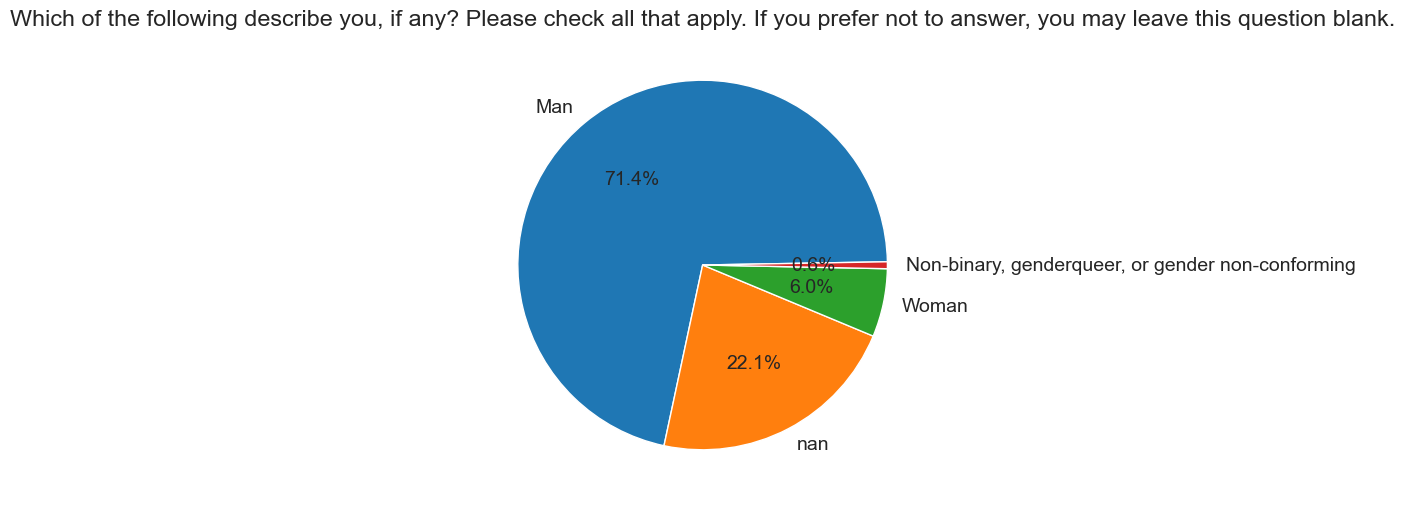

In [60]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=1);

## Educatio level

In [61]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [62]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

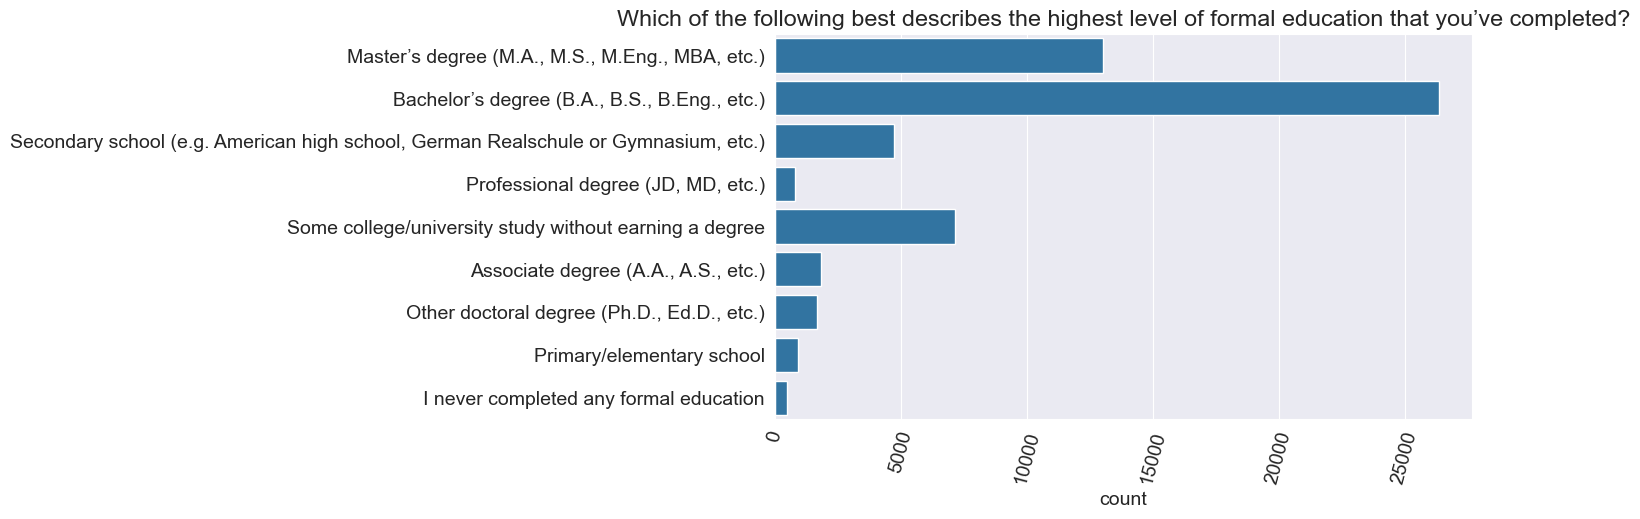

In [64]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [65]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [67]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

## Ask and answering Questions

In [68]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [69]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [70]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [71]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascnedings)
languages_interested_percentages

NameError: name 'split_multicolumn' is not defined